In [15]:
import pandas as pd

# Replace the paths with the actual locations of your datasets
train_file_path = "/content/DailyDelhiClimateTrain.csv"
test_file_path = "/content/DailyDelhiClimateTest.csv"

# Load train and test datasets
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

# Parse dates and set as index
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.set_index('date', inplace=True)

df_test['date'] = pd.to_datetime(df_test['date'])
df_test.set_index('date', inplace=True)

print("Train and Test datasets loaded successfully!")
print("\nTrain Dataset:")
print(df_train.head())

print("\nTest Dataset:")
print(df_test.head())


Train and Test datasets loaded successfully!

Train Dataset:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000

Test Dataset:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


QUESTION-1

In [16]:
# Import required libraries
import pandas as pd

train_file_path = "/content/DailyDelhiClimateTrain.csv"
test_file_path = "/content/DailyDelhiClimateTest.csv"

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

# Parse dates and set as index
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.set_index('date', inplace=True)

df_test['date'] = pd.to_datetime(df_test['date'])
df_test.set_index('date', inplace=True)

# Check structure of datasets
print("Train Dataset Info:")
print(df_train.info())

print("\nTest Dataset Info:")
print(df_test.info())

# Describe key statistics
print("\nTrain Dataset Statistics:")
print(df_train.describe())

print("\nTest Dataset Statistics:")
print(df_test.describe())

# Handle missing values
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
print("\nMissing values handled.")


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB
None

Train Dataset Statistics:
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  

QUESTION-2

<Figure size 1200x800 with 0 Axes>

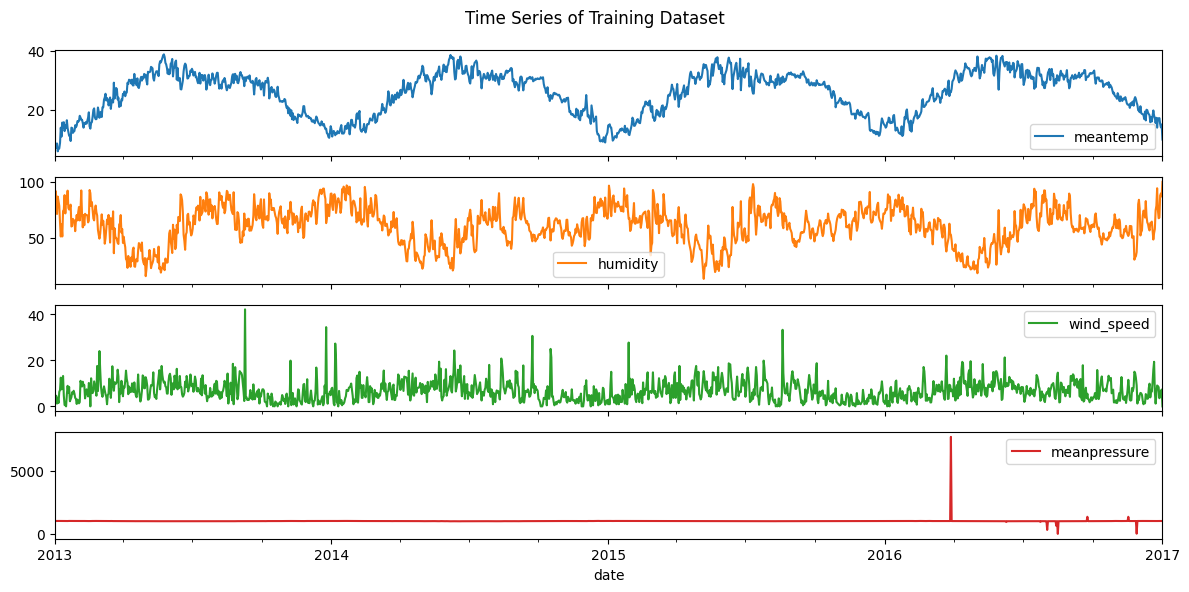

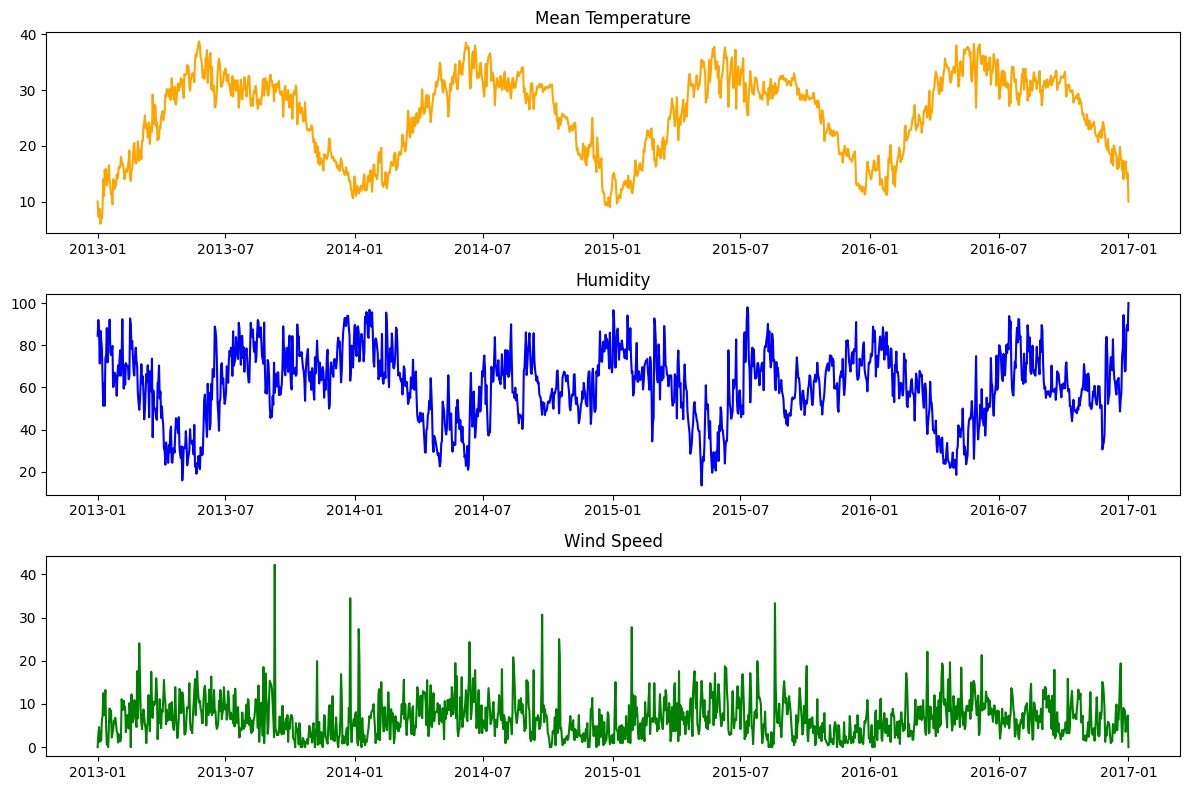

In [17]:
import matplotlib.pyplot as plt

# Time series plot for all variables in train dataset
plt.figure(figsize=(12, 8))
df_train.plot(title="Time Series of Training Dataset", figsize=(12, 6), subplots=True)
plt.tight_layout()
plt.show()

# Subplots for temperature and wind speed
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df_train.index, df_train['meantemp'], label='Mean Temperature', color='orange')
plt.title("Mean Temperature")

plt.subplot(3, 1, 2)
plt.plot(df_train.index, df_train['humidity'], label='Humidity', color='blue')
plt.title("Humidity")

plt.subplot(3, 1, 3)
plt.plot(df_train.index, df_train['wind_speed'], label='Wind Speed', color='green')
plt.title("Wind Speed")

plt.tight_layout()
plt.show()

QUESTION-3

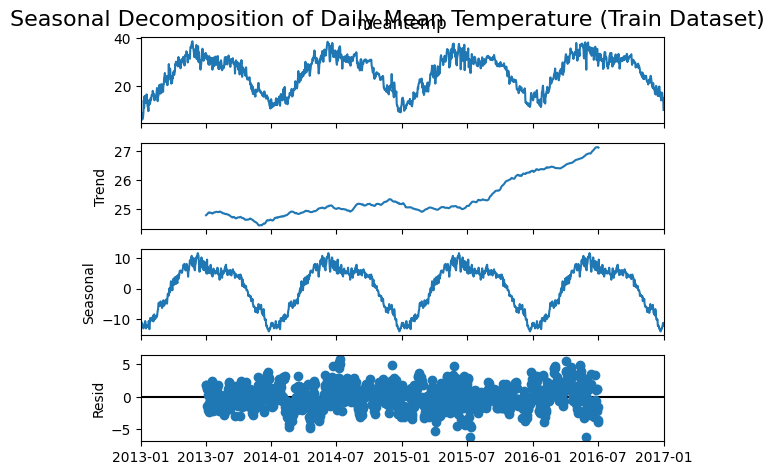

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the mean temperature from the train dataset
result_train = seasonal_decompose(df_train['meantemp'], model='additive', period=365)

# Plot trend, seasonality, and residuals
result_train.plot()
plt.suptitle("Seasonal Decomposition of Daily Mean Temperature (Train Dataset)", fontsize=16)
plt.show()



QUESTION-4

Mean Absolute Error (MAE): 10.61
Root Mean Squared Error (RMSE): 11.97


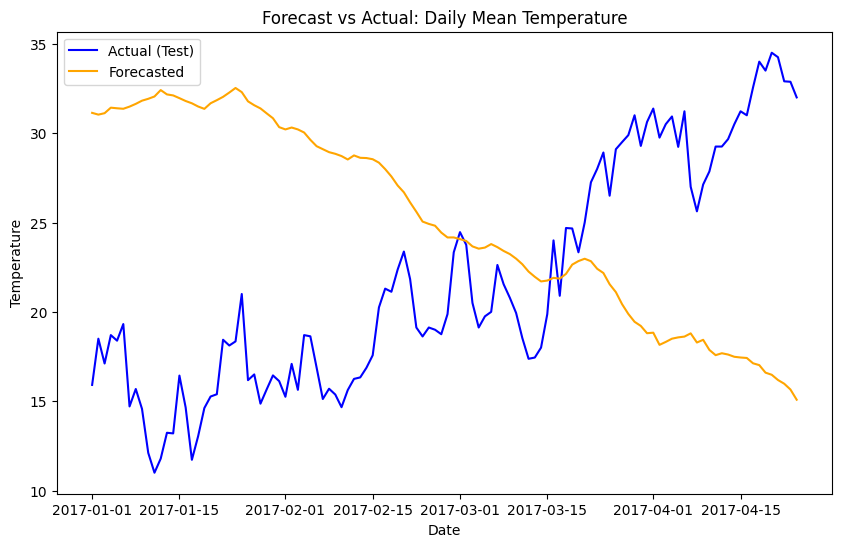

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Define train and test series
train_series = df_train['meantemp']
test_series = df_test['meantemp']

# Simplistic model: Use rolling mean for forecast (e.g., 7-day window)
rolling_mean_window = 7
forecast = train_series.rolling(window=rolling_mean_window).mean()[-len(test_series):]

# Evaluate the model performance
mae = mean_absolute_error(test_series, forecast)
rmse = sqrt(mean_squared_error(test_series, forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs forecasted
plt.figure(figsize=(10, 6))
plt.plot(test_series.index, test_series, label="Actual (Test)", color="blue")
plt.plot(test_series.index, forecast, label="Forecasted", color="orange")
plt.title("Forecast vs Actual: Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


Arima model and Lstm model train

Arima

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA Model Performance:
Mean Absolute Error (MAE): 9.54
Root Mean Squared Error (RMSE): 11.41


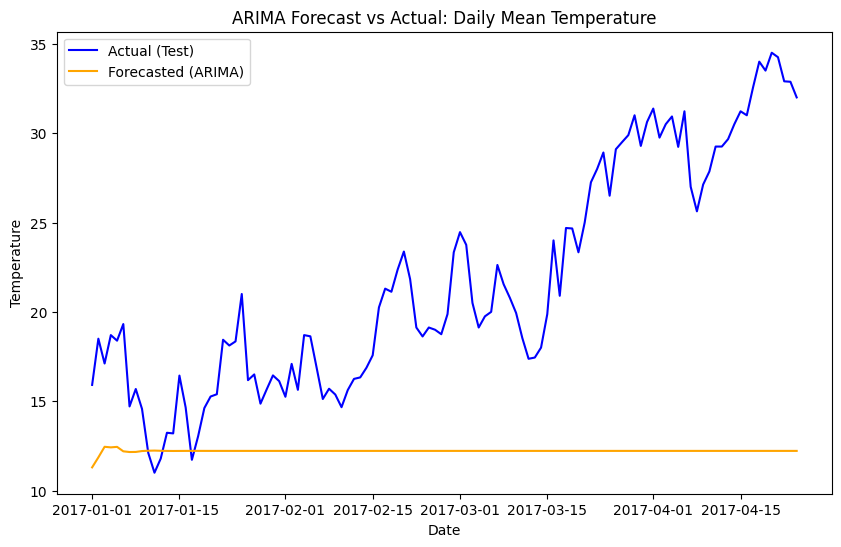

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# ARIMA model training and testing
def train_arima(train_series, test_series, order=(5, 1, 0)):
    # Train the ARIMA model
    model = ARIMA(train_series, order=order)
    model_fit = model.fit()

    # Forecast the test set
    forecast = model_fit.forecast(steps=len(test_series))

    # Evaluate the model
    mae = mean_absolute_error(test_series, forecast)
    rmse = sqrt(mean_squared_error(test_series, forecast))
    print(f"ARIMA Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(test_series.index, test_series, label="Actual (Test)", color="blue")
    plt.plot(test_series.index, forecast, label="Forecasted (ARIMA)", color="orange")
    plt.title("ARIMA Forecast vs Actual: Daily Mean Temperature")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.legend()
    plt.show()

# Prepare data
train_series = df_train['meantemp']
test_series = df_test['meantemp']

# Train and forecast using ARIMA
train_arima(train_series, test_series, order=(5, 1, 0))

LSTM

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.3012 - val_loss: 0.0145
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0108 - val_loss: 0.0086
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0058 - val_loss: 0.0078
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0052 - val_loss: 0.0076
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0053 - val_loss: 0.0095
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0054 - val_loss: 0.0073
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0050 - val_loss: 0.0073
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0050 - val_loss: 0.0078
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0047 - val_loss: 0.0069
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0046 - val_loss: 0.0081
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0043 - val_loss: 0.0062
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043 - val_l

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
LSTM Model Performance:
Mean Absolute Error (MAE): 2.11
Root Mean Squared Error (RMSE): 2.51


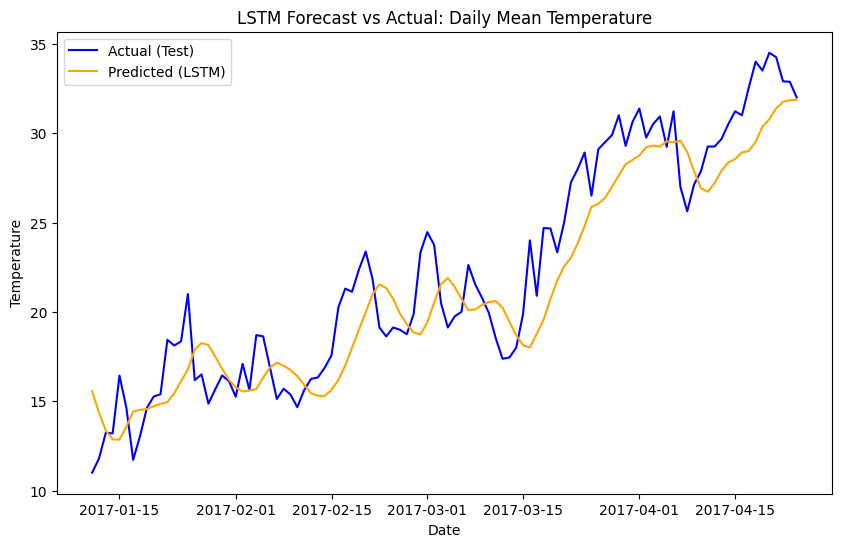

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize train and test datasets
train_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1))
test_scaled = scaler.transform(test_series.values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X_train, y_train = create_sequences(train_scaled, time_steps)
X_test, y_test = create_sequences(test_scaled, time_steps)

# Reshape input for LSTM (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], time_steps, 1))
X_test = X_test.reshape((X_test.shape[0], time_steps, 1))

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1), return_sequences=True),
    LSTM(50, activation='relu', return_sequences=False),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on test data
predicted_scaled = model.predict(X_test)

# Inverse scale the predictions
predicted = scaler.inverse_transform(predicted_scaled)
y_test_actual = scaler.inverse_transform(y_test)

# Evaluate the model
mae = mean_absolute_error(y_test_actual, predicted)
rmse = sqrt(mean_squared_error(y_test_actual, predicted))
print(f"LSTM Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_series.index[time_steps:], y_test_actual, label="Actual (Test)", color="blue")
plt.plot(test_series.index[time_steps:], predicted, label="Predicted (LSTM)", color="orange")
plt.title("LSTM Forecast vs Actual: Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()